In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
#sklearn gives us some of the base datasets to practice
from sklearn.datasets import load_boston
load_boston()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
df = load_boston()

In [9]:
type(df)

sklearn.utils.Bunch

In [11]:
#creating a dataframe
data = pd.DataFrame(df.data)

In [12]:
type(data)

pandas.core.frame.DataFrame

In [13]:
#assigning col names to the dataframe 
data.columns = df.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
#Independent features and dependent features
x = data
y = df.target

In [19]:
type(x)

pandas.core.frame.DataFrame

In [21]:
type(y)

numpy.ndarray

In [22]:
#split data into train and test
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [23]:
#since we have diff features with diff units, standard scaling features make sense
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
#in the above step, scaler has already learnt from fit_transform, we want to surprise it by passing "transform" in x test
x_test = scaler.transform(x_test)

In [25]:
#if we want to go back to our original values, we will do inverse transform
x_train_original = scaler.inverse_transform(x_train)
x_test_original = scaler.inverse_transform(x_test)

In [26]:
#importing linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
lr.fit(x_train_original, y_train)

LinearRegression()

In [37]:
#Since we have so many features, we will use Cross Validation
from sklearn.model_selection import cross_val_score
mse =     cross_val_score(lr, x_train,          y_train, scoring='neg_mean_squared_error', cv = 5)
mse_inv = cross_val_score(lr, x_train_original, y_train, scoring='neg_mean_squared_error', cv = 5)

In [38]:
mse.mean()

-23.65441827030464

In [39]:
mse_inv.mean()

-23.654418270304625

In [41]:
y_pred = lr.predict(x_test)
y_pred_inv = lr.predict(x_test_original)

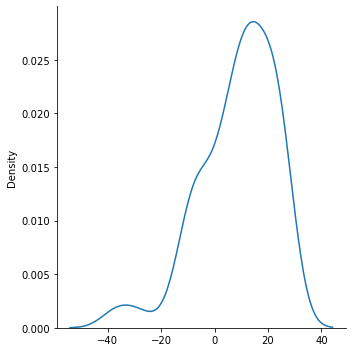

In [42]:
import seaborn as sns
sns.displot(y_pred - y_test, kind = 'kde')

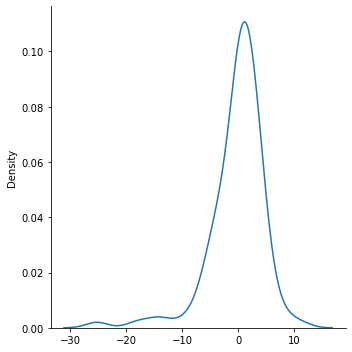

In [43]:
sns.displot(y_pred_inv - y_test, kind = 'kde')

In [46]:
from sklearn.metrics import r2_score
residuals = r2_score(y_test, y_pred)
residuals

-2.721368657420708

In [48]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 14.19
Mean squared error = 272.9
Median absolute error = 12.62
Explain variance score = -1.7
R2 score = -2.72


In [ ]:
#Mean absolute error: This is the average of absolute errors of all the data points in the given dataset.
#Mean squared error: This is the average of the squares of the errors of all the data points in the given dataset. It is one of the most popular metrics out there!
#Median absolute error: This is the median of all the errors in the given dataset. The main advantage of this metric is that it's robust to outliers. A single bad point in the test dataset wouldn't skew the entire error metric, as opposed to a mean error metric.
#Explained variance score: This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect.
#R2 score: This is pronounced as R-squared, and this score refers to the coefficient of determination. This tells us how well the unknown samples will be predicted by our model. The best possible score is 1.0, but the score can be negative as well.

In [ ]:
#Negative residual means features have very less significance on the output. 
#Hence we can declare this problem may not be solved using linear regression which is fair enough since we have had close to 13 features.
#To solve such a problem, we need either multiple linear regression or polynomial regression.